In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import joblib

In [29]:
df = pd.read_csv("./IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
values=df.species.unique()
values

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [31]:
df.dropna(inplace=True)

In [32]:
def encode(a):
    if a==values[0]:
        return 0
    elif a==values[1]:
        return 1
    else :
        return 2

In [33]:
df['species']=df['species'].apply(encode)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


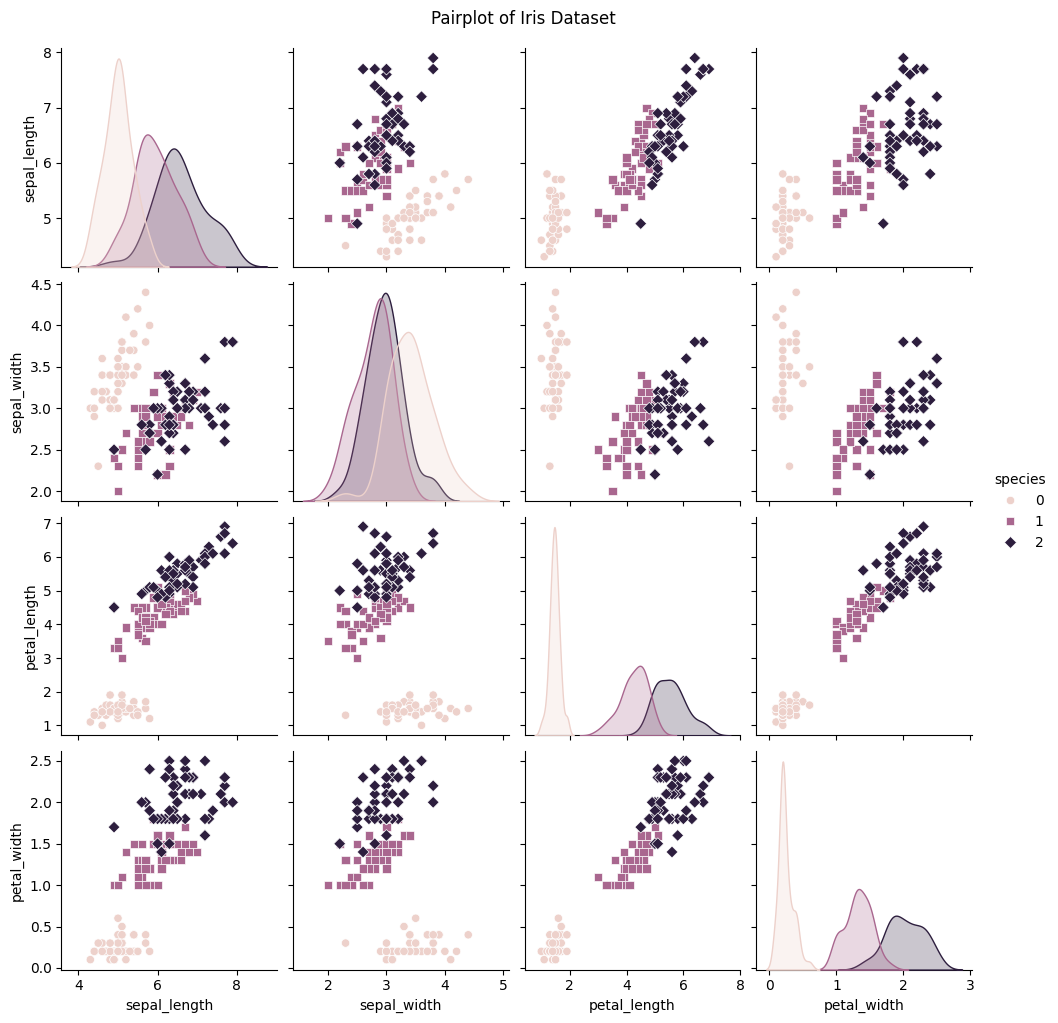

In [34]:
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

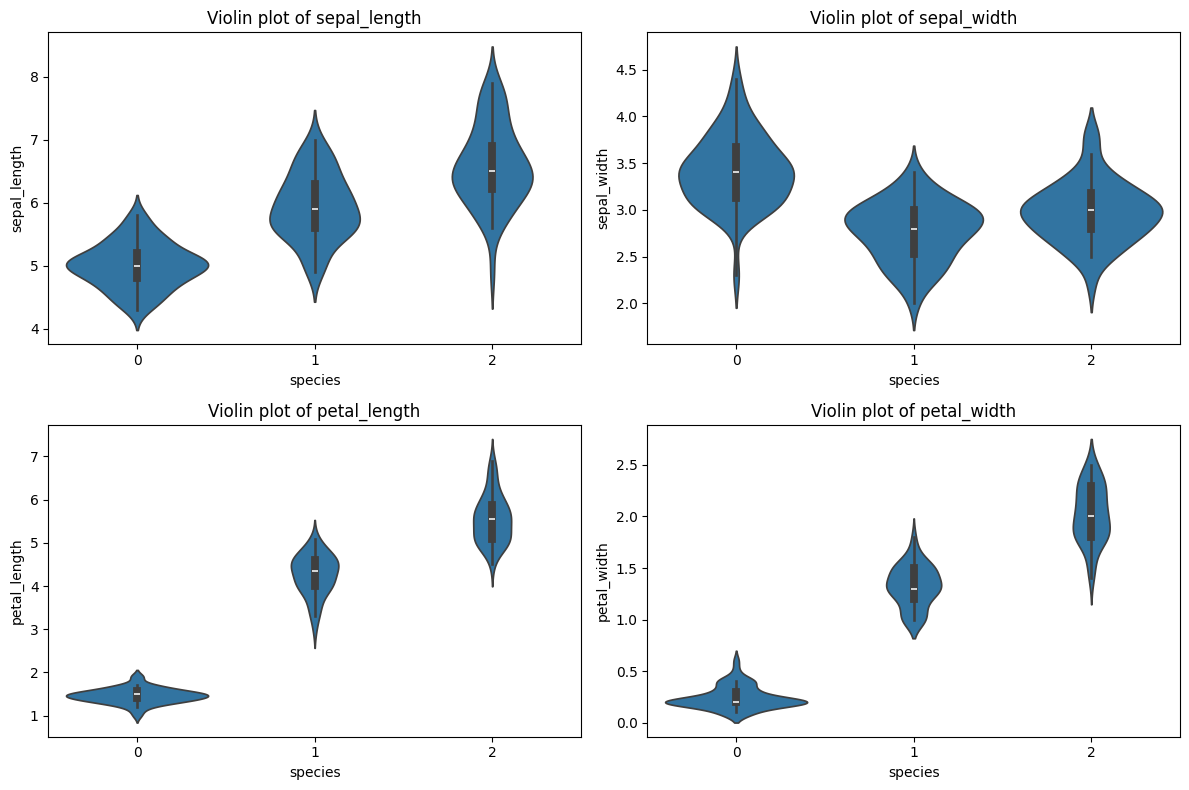

In [35]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):  # Exclude the species column
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='species', y=column, data=df)
    plt.title(f'Violin plot of {column}')
plt.tight_layout()
plt.show()

In [44]:
x=df.drop('species',axis=1)
y=df.species

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=True)

In [50]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [51]:
model.score(x_test,y_test)*100

96.66666666666667

In [53]:
y_pred=model.predict(x_test)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [56]:
joblib.dump(model,'iris_model.joblib')

['iris_model.joblib']